In [338]:
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [339]:
diabetes = pd.read_csv('Pima_Indian_diabetes.csv')

In [340]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.600000,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.600000,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.300000,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,19.179925,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.100000,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.900000,0.171,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.800000,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.200000,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.100000,0.349,47.0,1


In [341]:
## error handling!!
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 742 non-null float64
Glucose                     752 non-null float64
BloodPressure               768 non-null float64
SkinThickness               746 non-null float64
Insulin                     768 non-null float64
BMI                         757 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         749 non-null float64
Outcome                     768 non-null int64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [342]:
#cleaning my data ... removing negative values and rplacing 0 with nan
diabetes[diabetes<0]=0
diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']] = diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']].replace(0,np.NaN)

In [343]:
# we see that columns contain null values...

In [344]:
# lets calculate the percentage of missing in each column
diabetes.isnull().sum()

Pregnancies                  26
Glucose                      21
BloodPressure                35
SkinThickness               242
Insulin                     374
BMI                          25
DiabetesPedigreeFunction      0
Age                          19
Outcome                       0
dtype: int64

In [345]:
# total entries
diabetes.isnull().count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [346]:
percentage_of_NaN = (diabetes.isnull().sum()/diabetes.isnull().count())*100
percentage_of_NaN.round(2)
#as percentage of null is and very high as expected!

Pregnancies                  3.39
Glucose                      2.73
BloodPressure                4.56
SkinThickness               31.51
Insulin                     48.70
BMI                          3.26
DiabetesPedigreeFunction     0.00
Age                          2.47
Outcome                      0.00
dtype: float64

In [347]:
# lets see correlation 
diabetes.corr()
#....................................Graph
# conclusion:
#pregnansics and blooadpressure is high corr with age
# #insulin with glucose
#Skin thickness with #bmi

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.085810,0.183050,0.094895,0.059893,-0.008012,-0.039072,0.468572,0.195926
Glucose,0.085810,1.000000,0.201763,0.238742,0.585062,0.206989,0.123252,0.252611,0.497170
BloodPressure,0.183050,0.201763,1.000000,0.222878,0.104398,0.292438,-0.004352,0.309424,0.166544
SkinThickness,0.094895,0.238742,0.222878,1.000000,0.182842,0.619866,0.123497,0.116764,0.251713
Insulin,0.059893,0.585062,0.104398,0.182842,1.000000,0.226362,0.130395,0.198189,0.303454
BMI,-0.008012,0.206989,0.292438,0.619866,0.226362,1.000000,0.163919,0.026909,0.297380
DiabetesPedigreeFunction,-0.039072,0.123252,-0.004352,0.123497,0.130395,0.163919,1.000000,0.037554,0.173844
Age,0.468572,0.252611,0.309424,0.116764,0.198189,0.026909,0.037554,1.000000,0.216095
Outcome,0.195926,0.497170,0.166544,0.251713,0.303454,0.297380,0.173844,0.216095,1.000000


In [348]:
#.................plotting started...........................

In [349]:
def correlation_plot():
    correlation = diabetes.corr()
    #all my columns
    matrix_cols = correlation.columns.tolist()
    #convert to array
    corr_array  = np.array(correlation)
    trace = go.Heatmap(z = corr_array,
                       x = matrix_cols,
                       y = matrix_cols,
                       colorscale='Viridis',
                       colorbar   = dict() ,
                      )
    layout = go.Layout(dict(title = 'Correlation Matrix',
                            margin  = dict(r = 0 ,l = 100,
                                           t = 0,b = 100,
                                         ),
                            yaxis   = dict(tickfont = dict(size = 9)),
                            xaxis   = dict(tickfont = dict(size = 9)),
                           )
                      )
    fig = go.Figure(data = [trace],layout = layout)
    py.iplot(fig)
#correlation_plot()  

In [350]:
#all not zeros
D = diabetes[(diabetes['Outcome'] != 0)]
# all zeros
H = diabetes[(diabetes['Outcome'] == 0)]
#total plotting
def target_count():
    trace = go.Bar( x = diabetes['Outcome'].value_counts().values.tolist(), 
                    y = ['healthy','diabetic'], 
                    orientation = 'h', 
                    text=diabetes['Outcome'].value_counts().values.tolist(), 
                    textfont=dict(size=15),
                    textposition = 'auto',
                    opacity = 0.8,marker=dict(
                    color=['red', 'gold'],
                    line=dict(color='#000000',width=0)))

    layout = dict(title =  'Count of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)
    
#target_count()

In [351]:
def target_percent():
    trace = go.Pie(labels = ['healthy','diabetic'], values = diabetes['Outcome'].value_counts(), 
                   textfont=dict(size=15), opacity = 0.8,
                   marker=dict(colors=['red', 'gold'], 
                               line=dict(color='#000000', width=1.5)))


    layout = dict(title =  'Distribution of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)
    
#target_percent()

In [352]:
#plotting the corellation graph
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns

In [353]:
#....................ended....................

In [354]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,742.000000,747.000000,733.000000,526.000000,394.000000,743.000000,768.000000,749.000000,768.000000
mean,3.886358,120.769083,72.185074,28.874152,155.548223,32.359164,0.471876,33.761336,0.348958
std,3.443762,30.944811,12.502210,10.598375,118.775855,7.152753,0.331329,12.297409,0.476951
min,0.000000,42.974768,15.372031,7.000000,14.000000,5.317899,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,21.000000,76.250000,27.450000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [355]:
from sklearn.linear_model import LinearRegression
path="Pima_Indian_diabetes.csv"
#cleaning of data by means and Linear regressions 
def impute(train,test,feat):
    results=[]
    j=0
    d={0:4,1:3}
    for i in train:
        lr=LinearRegression()
        lr.fit(i[0],i[1])
        res=lr.predict(test[j])
        feat.iloc[test[j].index,d[j]]=res
        j+=1
        results.append(res)
    return feat


def clean(path):
    linear_regression=["Insulin","SkinThickness"]
    data=pd.read_csv(path)
    h=data[data["Outcome"]==0]
    d=data[data["Outcome"]==1]
    feat=data.drop("Outcome",axis=1)
    targets=data["Outcome"]
    l=list(feat.columns.values)
    x=lambda l,i:l.remove(i)
    for i in linear_regression:x(l,i)
    for i in l:
        feat[i].replace(0,np.NaN,inplace=True)
        feat[i].fillna(feat[i].mean(),inplace=True)
    data_both=feat[l]
    for i in linear_regression:feat[i].replace(np.NaN,0,inplace=True)
   
    indexes_in=feat["Insulin"]!=0
    indexes_st=feat["SkinThickness"]!=0
 
    inf_in=feat["Insulin"]==0
    inf_st=feat["SkinThickness"]==0
    inf_data_in=data_both[inf_in]
 
    inf_data_st=data_both[inf_st]
 
    data_in=data_both[indexes_in]
    targets_in=feat[indexes_in].Insulin
    targets_st=feat[indexes_st].SkinThickness
    data_st=data_both[indexes_st]
#   print(feat)
    train_set=[(data_in,targets_in),(data_st,targets_st)]
    test_set=[inf_data_in,inf_data_st]
    results=impute(train_set,test_set,feat)
    return results,targets

In [356]:
X,Y = clean(path)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.000000,148.0,72.0,35.000000,224.139260,33.600000,0.627,50.0
1,1.000000,85.0,66.0,29.000000,72.458329,26.600000,0.351,31.0
2,8.000000,183.0,64.0,24.534100,260.249752,23.300000,0.672,32.0
3,1.000000,89.0,66.0,23.000000,94.000000,19.179925,0.167,21.0
4,4.511034,137.0,40.0,35.000000,168.000000,43.100000,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.900000,0.171,63.0
764,2.000000,122.0,70.0,27.000000,164.423193,36.800000,0.340,27.0
765,5.000000,121.0,72.0,23.000000,112.000000,26.200000,0.245,30.0
766,1.000000,126.0,60.0,26.143442,183.066052,30.100000,0.349,47.0


In [357]:
X.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [358]:
Y.isnull().sum()

0

In [359]:
X["Outcome"]=Y
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,224.139260,33.600000,0.627,50.0,1
1,1.000000,85.0,66.0,29.000000,72.458329,26.600000,0.351,31.0,0
2,8.000000,183.0,64.0,24.534100,260.249752,23.300000,0.672,32.0,1
3,1.000000,89.0,66.0,23.000000,94.000000,19.179925,0.167,21.0,0
4,4.511034,137.0,40.0,35.000000,168.000000,43.100000,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.900000,0.171,63.0,0
764,2.000000,122.0,70.0,27.000000,164.423193,36.800000,0.340,27.0,0
765,5.000000,121.0,72.0,23.000000,112.000000,26.200000,0.245,30.0,0
766,1.000000,126.0,60.0,26.143442,183.066052,30.100000,0.349,47.0,1


In [360]:
X.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [361]:
#spliting the dataset!
from sklearn.model_selection import train_test_split
outcome=X['Outcome']
data=X[X.columns[:8]]
train,test=train_test_split(X,test_size=0.25,random_state=0,stratify=X['Outcome'])
train.describe()
test.describe()
train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']

In [362]:
#modal using sklearn Logistic regressions
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_Y))
accuracy_Logistic = metrics.accuracy_score(prediction,test_Y)

The accuracy of the Logistic Regression is 0.8020833333333334


/home/goli/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [363]:
#modal using svms
from sklearn import svm
types=['linear']
for i in types:
    model=svm.SVC(kernel=i)
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    print('The accuracy of the SVM kernel ',i,'is',metrics.accuracy_score(prediction,test_Y))
accuracy_SVM = metrics.accuracy_score(prediction,test_Y)

The accuracy of the SVM kernel  linear is 0.7760416666666666


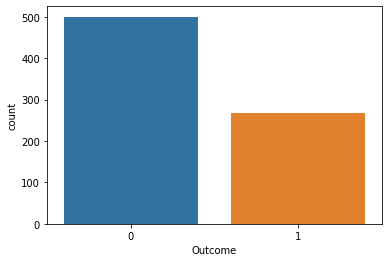

In [364]:
###plotting EDA....
sns.countplot(x='Outcome',data=X)
plt.show()

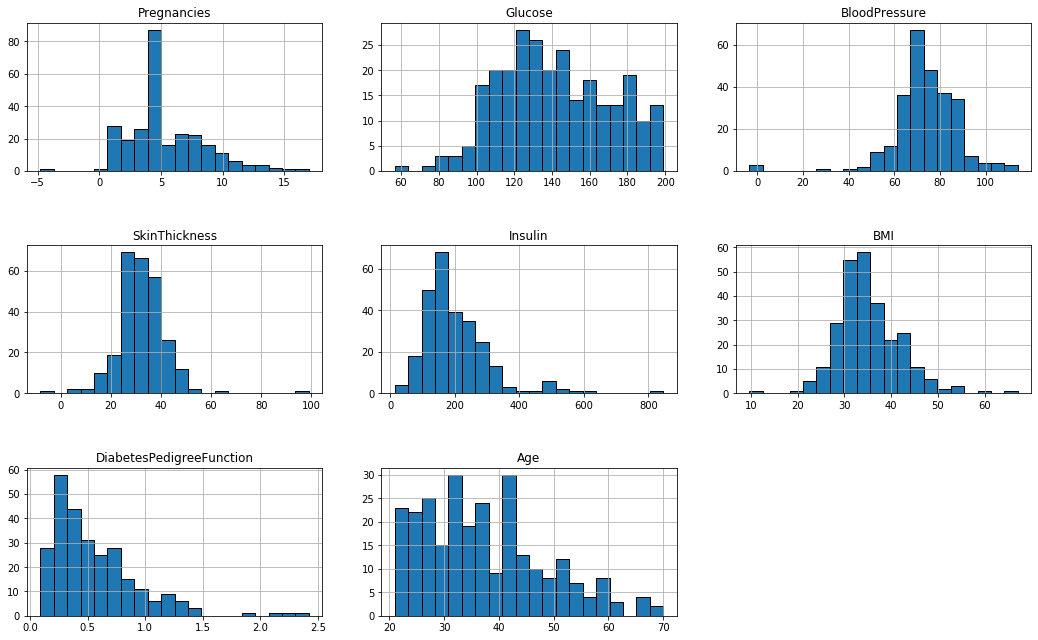

In [365]:
#plotting with diabetes
X1=X[X['Outcome']==1]
columns=X.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    X1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

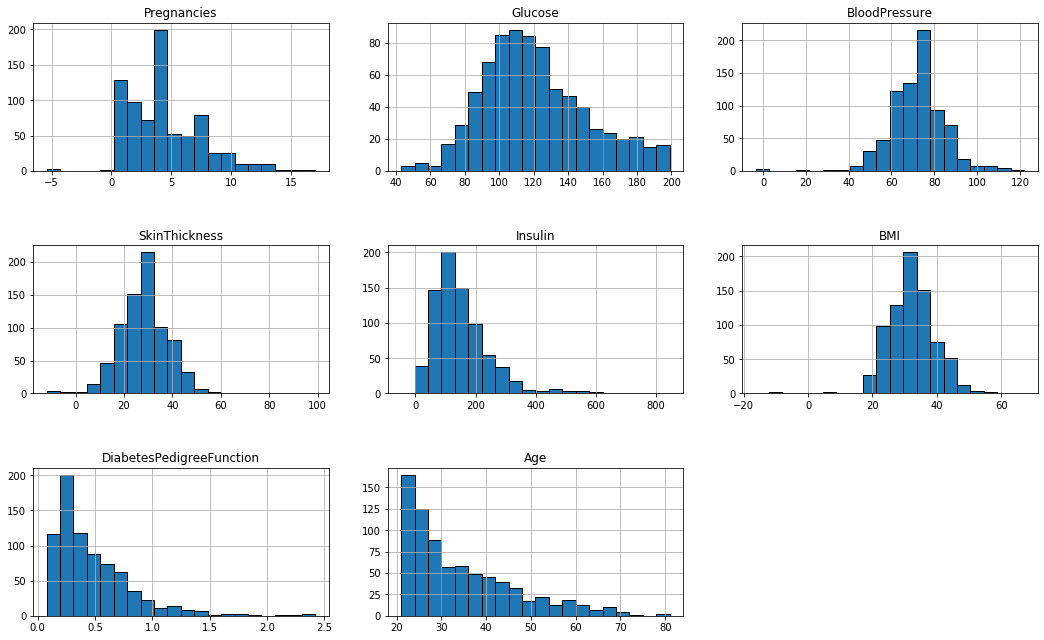

In [366]:
#histogram for with and wothout diabetes
import itertools
columns=X.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    X[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

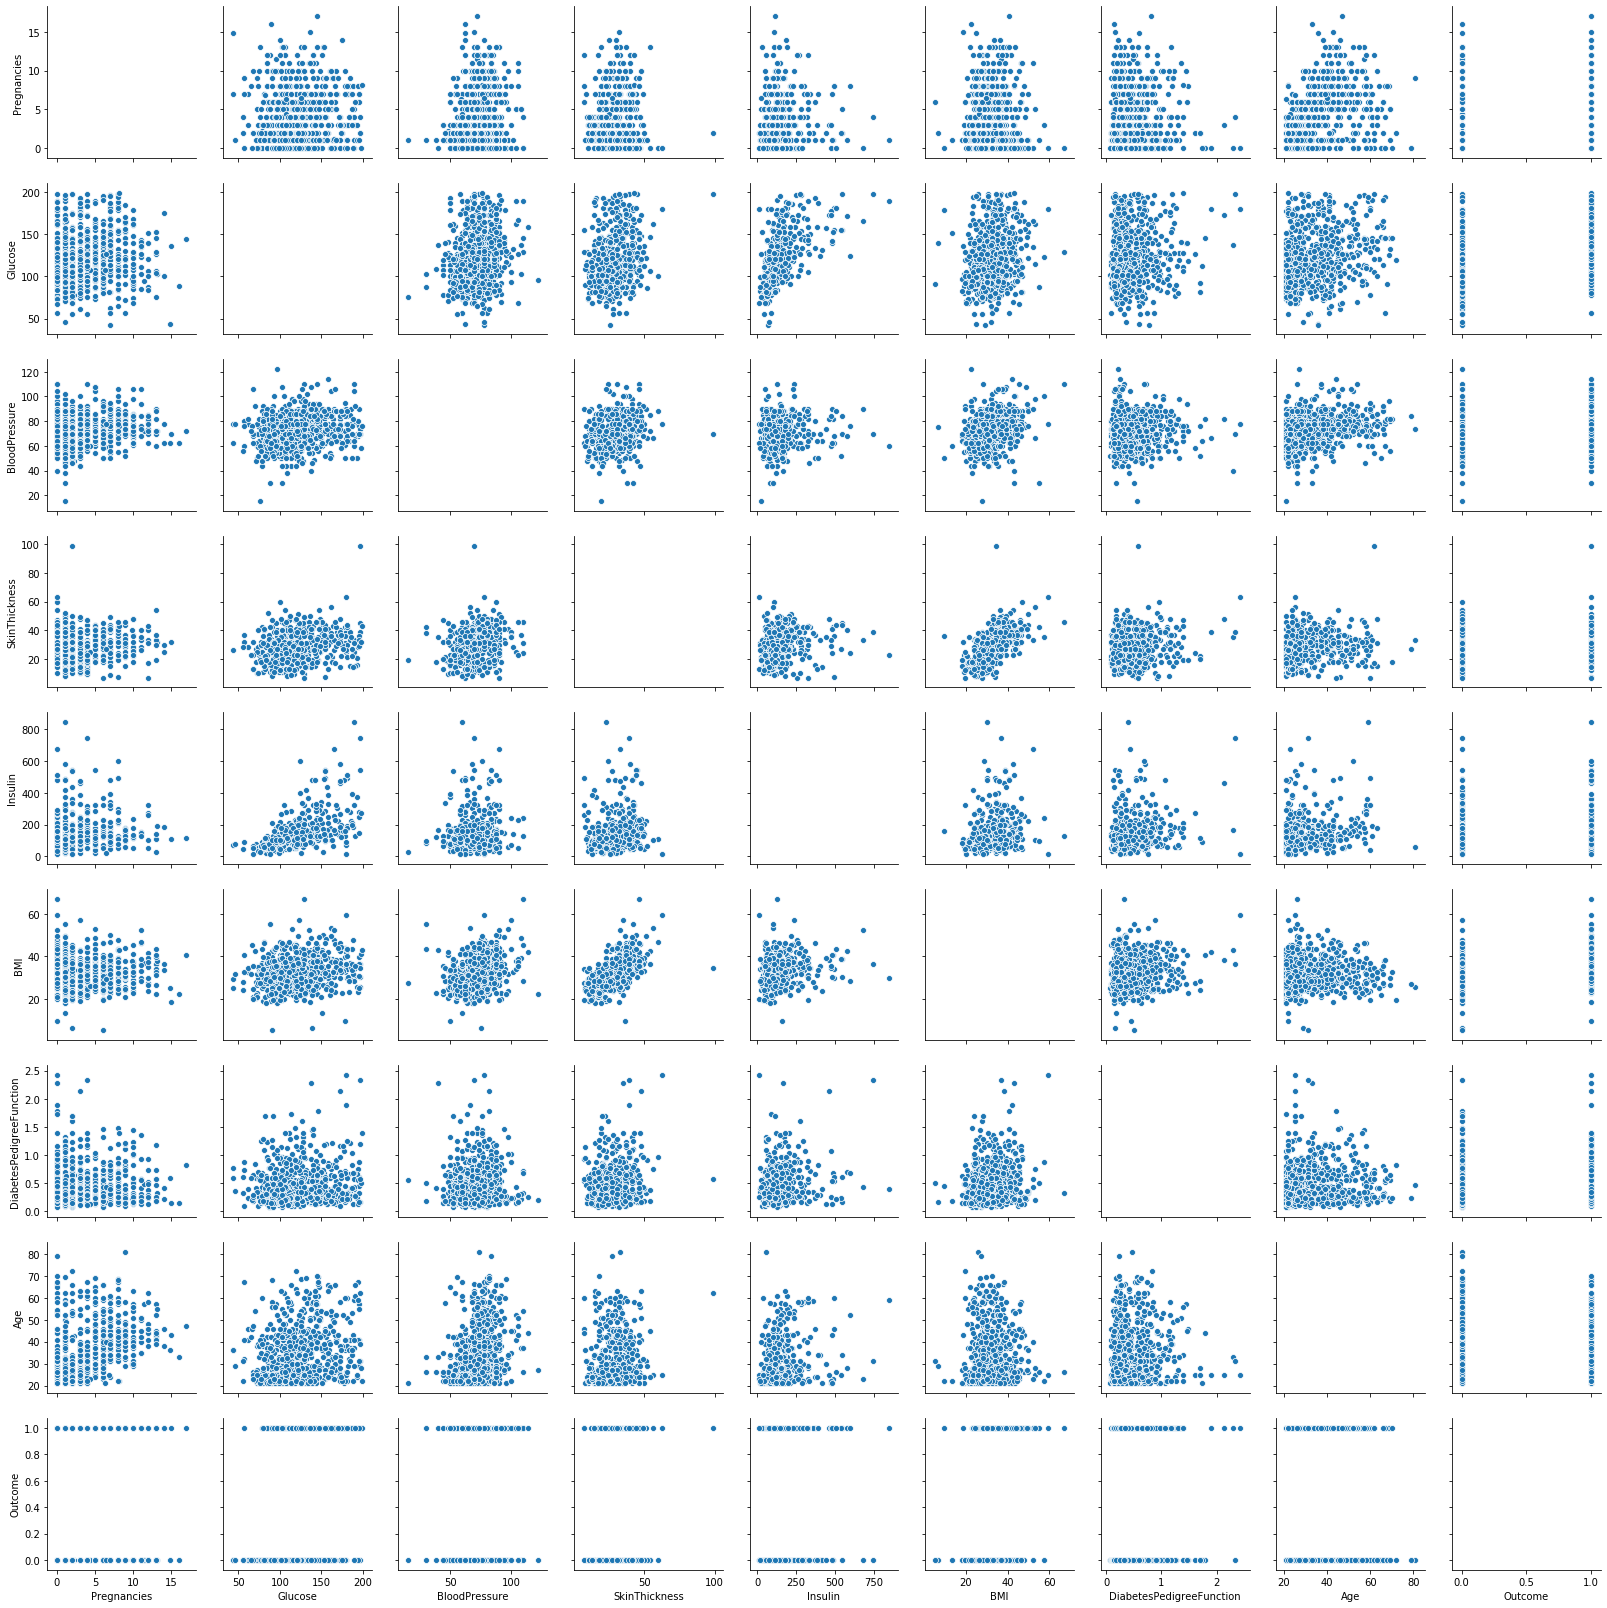

In [367]:
sns.pairplot(data=diabetes,diag_kind='histogram')
plt.show()

In [368]:
#Standeridaztion!
from sklearn import preprocessing
standardized_X = preprocessing.scale(X)
standardized_X

array([[ 0.48885494,  0.89286463,  0.00910078, ...,  0.46849198,
         1.33803201,  1.36589591],
       [-1.15273756, -1.17281948, -0.45024502, ..., -0.36506078,
        -0.22752832, -0.73212021],
       [ 1.14549194,  2.04046691, -0.60336029, ...,  0.60439732,
        -0.14513041,  1.36589591],
       ...,
       [ 0.16053644,  0.00757144,  0.00910078, ..., -0.68519336,
        -0.30992623, -0.73212021],
       [-1.15273756,  0.17151462, -0.90959082, ..., -0.37110101,
         1.09083828,  1.36589591],
       [-1.15273756, -0.91051039, -0.14401449, ..., -0.47378505,
        -0.88671162, -0.73212021]])

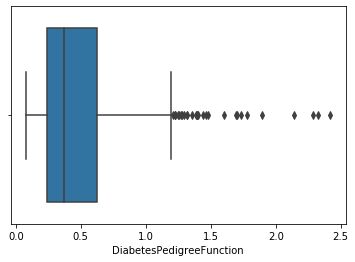

In [369]:
sns.boxplot(diabetes['DiabetesPedigreeFunction'])

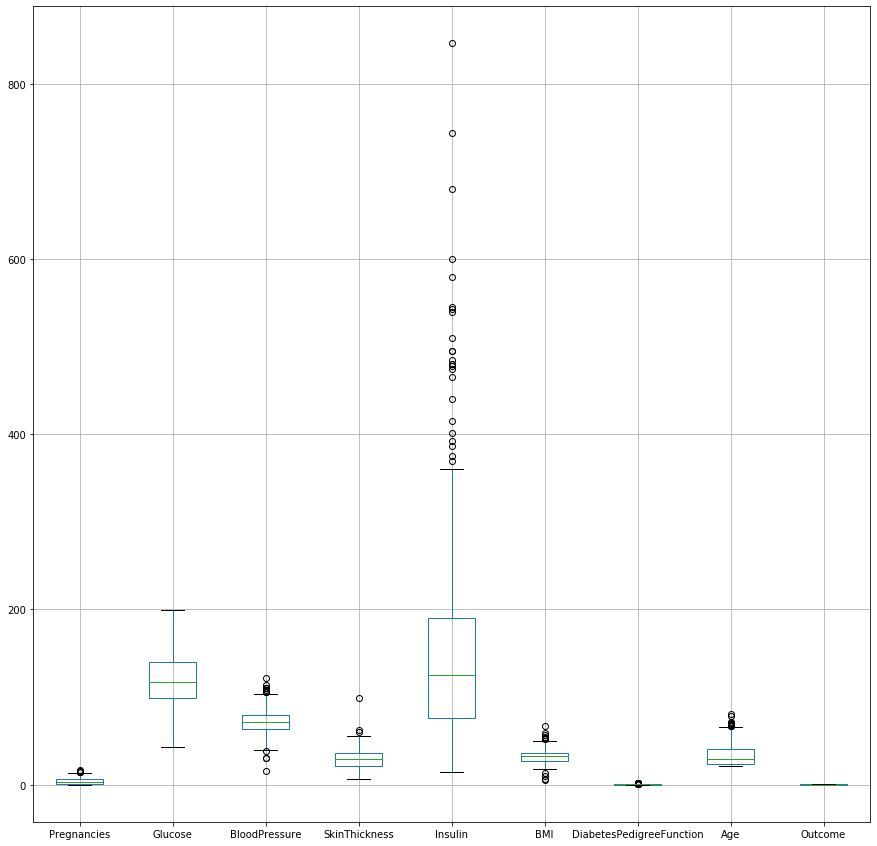

In [370]:
diabetes.boxplot(figsize=(15,15))

In [371]:
#Standeridaztion!
X1,Y1 = clean(path)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scale = sc.fit_transform(X1)
X_scale
X_scale_dataframe = pd.DataFrame(X_scale, columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness","Insulin", "BMI", "DiabetesPedigreeFunction", "Age"])
#rounding to 3
X_scale_dataframe.round(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.489,0.893,0.009,0.674,0.735,0.191,0.468,1.338
1,-1.153,-1.173,-0.450,0.077,-0.804,-0.723,-0.365,-0.228
2,1.145,2.040,-0.603,-0.368,1.101,-1.154,0.604,-0.145
3,-1.153,-1.042,-0.450,-0.520,-0.585,-1.692,-0.921,-1.052
4,-0.000,0.532,-2.441,0.674,0.165,1.432,5.485,-0.063
...,...,...,...,...,...,...,...,...
763,1.802,-0.648,0.315,1.967,0.287,0.100,-0.909,2.409
764,-0.824,0.040,-0.144,-0.122,0.129,0.609,-0.398,-0.557
765,0.161,0.008,0.009,-0.520,-0.403,-0.775,-0.685,-0.310
766,-1.153,0.172,-0.910,-0.208,0.318,-0.266,-0.371,1.091


In [372]:
#X["Outcome"]=Y
X_scale_dataframe['Outcome']=Y1
X_scale_dataframe.round(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.489,0.893,0.009,0.674,0.735,0.191,0.468,1.338,1
1,-1.153,-1.173,-0.450,0.077,-0.804,-0.723,-0.365,-0.228,0
2,1.145,2.040,-0.603,-0.368,1.101,-1.154,0.604,-0.145,1
3,-1.153,-1.042,-0.450,-0.520,-0.585,-1.692,-0.921,-1.052,0
4,-0.000,0.532,-2.441,0.674,0.165,1.432,5.485,-0.063,1
...,...,...,...,...,...,...,...,...,...
763,1.802,-0.648,0.315,1.967,0.287,0.100,-0.909,2.409,0
764,-0.824,0.040,-0.144,-0.122,0.129,0.609,-0.398,-0.557,0
765,0.161,0.008,0.009,-0.520,-0.403,-0.775,-0.685,-0.310,0
766,-1.153,0.172,-0.910,-0.208,0.318,-0.266,-0.371,1.091,1


In [373]:
# std splitting

#outcome=X['Outcome']
#data=X[X.columns[:8]]
#train,test=train_test_split(X,test_size=0.25,random_state=0,stratify=X['Outcome'])
#train.describe()
#test.describe()
#train_X=train[train.columns[:8]]
#test_X=test[test.columns[:8]]
#train_Y=train['Outcome']
#test_Y=test['Outcome']

std_train,std_test=train_test_split(X_scale_dataframe,test_size=0.25,random_state=0,stratify=X['Outcome'])
std_train_X=std_train[std_train.columns[:8]]
std_test_X=std_test[std_test.columns[:8]]
std_train_Y=std_train['Outcome']
std_test_Y=std_test['Outcome']

In [374]:
#moidel1
model1 = LogisticRegression()
model1.fit(std_train_X,std_train_Y)
prediction=model.predict(std_test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,std_test_Y))

The accuracy of the Logistic Regression is 0.6510416666666666


/home/goli/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



<BarContainer object of 2 artists>

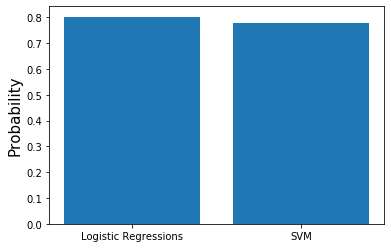

In [375]:

names= ['Logistic Regressions','SVM']
values=[accuracy_Logistic,accuracy_SVM]
plt.ylabel('Probability', fontsize=15)
plt.bar(names, values)

In [376]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_X_trained = pca.fit_transform(std_train_X)
pca_X_tested = pca.transform(std_test_X)
explained_variance = pca.explained_variance_ratio_
#new extracted indepent variables.
#variance
#so the first two can explain the varaince modal
explained_variance

array([0.29809476, 0.18833627])

In [377]:
29809476+18833627+16046849

64689952

In [378]:
pca_X_trained
#X_scale_dataframe = pd.DataFrame(X_scale, columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness","Insulin", "BMI", "DiabetesPedigreeFunction", "Age"])
#rounding to 3
#X_scale_dataframe.round(3)
pca_X_trained_dataframe = pd.DataFrame(pca_X_trained, columns = ["1","2"])

In [379]:
pca_X_trained_dataframe

,1,2
0,-2.352310,-0.584298
1,-0.076877,1.615077
2,-0.049835,1.069299
3,2.532981,-2.796056
4,-1.440583,-0.670431
...,...,...
571,0.710370,0.828261
572,0.192086,0.217726
573,-2.281298,0.963921
574,2.313936,-1.069001


In [380]:
std_train_Y


432    0
453    0
706    1
606    1
118    0
      ..
628    0
456    0
398    0
378    1
294    0
Name: Outcome, Length: 576, dtype: int64

In [381]:
pca_X_tested_dataframe = pd.DataFrame(pca_X_tested, columns = ["1","2"])
pca_X_tested_dataframe 


,1,2
0,0.043235,-1.589515
1,-2.315662,-0.976200
2,-0.283062,-0.482311
3,-0.393019,-0.117955
4,-1.552185,0.711609
...,...,...
187,2.725750,0.346970
188,-0.399591,1.588007
189,-0.902283,0.812911
190,-2.630745,-0.289662


In [382]:
std_test_Y

147    0
565    0
390    0
736    0
587    0
      ..
339    1
140    0
463    0
525    0
56     1
Name: Outcome, Length: 192, dtype: int64

In [383]:
#applying logistic regression
model2 = LogisticRegression()
model2.fit(pca_X_trained_dataframe,std_train_Y)
prediction=model2.predict(pca_X_tested_dataframe)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,std_test_Y))

The accuracy of the Logistic Regression is 0.7552083333333334


/home/goli/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

